<a href="https://colab.research.google.com/github/GPadaka19/UAS_KB/blob/main/UAS_AI_22_11_5020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Mengatur path dataset
train_path = '/content/drive/MyDrive/!MATERI KULIAH/SEM. 4/KB/P14/dataset-ai/train'
val_path = '/content/drive/MyDrive/!MATERI KULIAH/SEM. 4/KB/P14/dataset-ai/val'
test_path = '/content/drive/MyDrive/!MATERI KULIAH/SEM. 4/KB/P14/dataset-ai//test'

In [ ]:
# Inisialisasi model
model = Sequential()

# Lapisan pertama: Convolutional layer dan Max Pooling layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))  # Ganti input_shape sesuai dataset
model.add(MaxPooling2D(pool_size=(3, 3)))

# Lapisan kedua: Convolutional layer dan Max Pooling layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

# Lapisan ketiga: Convolutional layer dan Max Pooling layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

# Flattening layer
model.add(Flatten())

# Fully connected layer dengan softmax activation function
model.add(Dense(7, activation='softmax'))

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Menampilkan ringkasan model
model.summary()

# Data Augmentation dan Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Loading dataset
training_set = train_datagen.flow_from_directory(train_path, target_size=(64, 64), batch_size=32, class_mode='categorical')
validation_set = val_datagen.flow_from_directory(val_path, target_size=(64, 64), batch_size=32, class_mode='categorical')
test_set = test_datagen.flow_from_directory(test_path, target_size=(64, 64), batch_size=32, class_mode='categorical')

# Memastikan ada sampel dalam training_set dan validation_set
if training_set.samples == 0:
    raise ValueError("Tidak ada sampel dalam training set. Pastikan folder dataset tidak kosong.")
if validation_set.samples == 0:
    raise ValueError("Tidak ada sampel dalam validation set. Pastikan folder dataset tidak kosong.")

# Menentukan steps_per_epoch dan validation_steps
train_steps = max(1, training_set.samples // training_set.batch_size)
val_steps = max(1, validation_set.samples // validation_set.batch_size)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 20, 20, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 18, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 32)          0

In [ ]:
epochs = 30
history = model.fit(training_set, steps_per_epoch=train_steps, epochs=epochs, validation_data=validation_set, validation_steps=val_steps)

Epoch 1/30
5/5 [==============================] - 53s 9s/step - loss: 1.9636 - accuracy: 0.1250 - val_loss: 1.9191 - val_accuracy: 0.2105
Epoch 2/30
5/5 [==============================] - 3s 717ms/step - loss: 1.9375 - accuracy: 0.1493 - val_loss: 1.9145 - val_accuracy: 0.1579
Epoch 3/30
5/5 [==============================] - 2s 441ms/step - loss: 1.9388 - accuracy: 0.1269 - val_loss: 1.9192 - val_accuracy: 0.1053
Epoch 4/30
5/5 [==============================] - 2s 482ms/step - loss: 1.9255 - accuracy: 0.1813 - val_loss: 1.9026 - val_accuracy: 0.2632
Epoch 5/30
5/5 [==============================] - 2s 422ms/step - loss: 1.9172 - accuracy: 0.2687 - val_loss: 1.8940 - val_accuracy: 0.3158
Epoch 6/30
5/5 [==============================] - 2s 432ms/step - loss: 1.9203 - accuracy: 0.2164 - val_loss: 1.8753 - val_accuracy: 0.3158
Epoch 7/30
5/5 [==============================] - 4s 779ms/step - loss: 1.9002 - accuracy: 0.2313 - val_loss: 1.8674 - val_accuracy: 0.1579
Epoch 8/30
5/5 [======

In [ ]:
evaluation = model.evaluate(test_set)
print(f"Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}")

1/1 [==============================] - 0s 424ms/step - loss: 1.3605 - accuracy: 0.3478
Test Loss: 1.3605389595031738, Test Accuracy: 0.3478260934352875


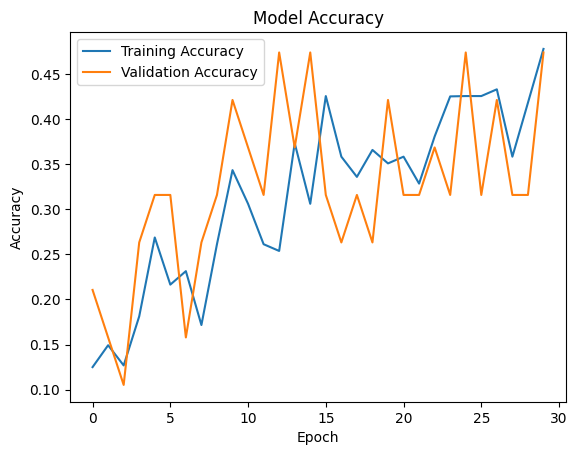

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Analisis Grafik Kedua: Model Accuracy

1. **Umum**:
   - Grafik kedua menunjukkan peningkatan dalam training accuracy dan validation accuracy selama 30 epoch.
   - Ada fluktuasi yang lebih signifikan pada akurasi dibandingkan dengan loss, yang bisa menunjukkan bahwa hasilnya lebih variatif dari epoch ke epoch.

2. **Training Accuracy**:
   - Training accuracy (garis biru) menunjukkan peningkatan yang konsisten dari sekitar 0.1 hingga lebih dari 0.45 pada akhir epoch.
   - Ini menunjukkan bahwa model semakin akurat dalam memprediksi data pelatihan.

3. **Validation Accuracy**:
   - Validation accuracy (garis oranye) menunjukkan fluktuasi yang cukup signifikan selama 30 epoch.
   - Akurasi validasi mencapai puncak sekitar 0.45 tetapi menunjukkan variasi besar yang mungkin menunjukkan overfitting atau data validasi yang kompleks.
   - Meski fluktuatif, validation accuracy tetap berada dalam kisaran yang dapat diterima dan menunjukkan bahwa model dapat menangani data yang tidak terlihat sebelumnya dengan tingkat akurasi yang memadai.

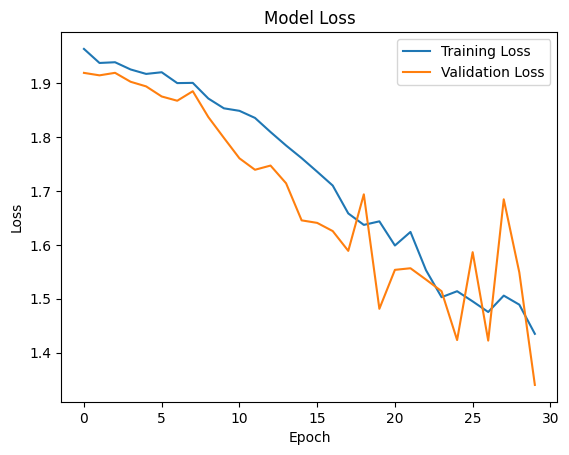

In [ ]:
# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Analisis Grafik Pertama: Model Loss

1. **Umum**:
   - Grafik pertama menunjukkan penurunan yang konsisten dalam training loss dan validation loss selama 30 epoch.
   - Penurunan loss ini menunjukkan bahwa model secara bertahap menjadi lebih baik dalam meminimalkan kesalahan pada data pelatihan dan validasi.

2. **Training Loss**:
   - Training loss (garis biru) dimulai sekitar 1.9 dan kemudian menurun secara konsisten hingga mendekati 1.4 pada akhir epoch ke-30.
   - Hal ini menunjukkan bahwa model secara efektif mempelajari pola dalam data pelatihan.

3. **Validation Loss**:
   - Validation loss (garis oranye) juga menunjukkan tren penurunan yang konsisten, meskipun terdapat beberapa fluktuasi.
   - Fluktuasi ini mungkin disebabkan oleh ketidakpastian atau keragaman dalam data validasi.
   - Validation loss berakhir lebih rendah dari training loss pada akhir epoch, yang dapat menunjukkan bahwa model tidak overfitting secara signifikan, setidaknya berdasarkan metrik ini.